# 📊 Trabajo Práctico – **Parte 1**
## Análisis Descriptivo con Pandas y Gráficos (Jupyter)
---
Este cuaderno cumple con los pasos solicitados para la **Parte 1** del trabajo en equipo:
1) Definir **población** y **muestra**.
2) Seleccionar **4 variables** (ordinal, nominal, continua y discreta).
3) Elaborar **tablas** y **gráficos** (torta, barras, histograma).
4) Calcular **moda**, **percentiles** y **medidas de dispersión**, y presentar **tabla + gráfico**.


### Paso 1: **Población y Muestra**
La **población** corresponde a todos los registros incluidos en la base de datos `16_MATRICULAS_ED_SUPERIOR_MAGALLANES_2021.xlsx`,
que representan a los estudiantes matriculados en la **educación superior de la Región de Magallanes** durante el año 2021.

La **muestra** que utilizamos para este análisis es **toda la población disponible** en el archivo, lo que asegura una representación completa.
Si se necesita trabajar con un subconjunto, puede extraerse una **muestra aleatoria** con `df.sample(100)`.


In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Cargar datos
df = pd.read_excel('16_MATRICULAS_ED_SUPERIOR_MAGALLANES_2021.xlsx')

df

,ID,GENERO,EDAD,RANGO EDAD,AÑO INGRESO,SEMESTRE INGRESO,TIPO DE INSTITUCION,NOMBRE DE INSTITUCION,ACREDITACION INSTITUCIONAL,PERIODO DE ACREDITACION,...,NIVEL CARRERA,AREA CONOCIMIENTO,DURACION PLAN DE ESTUDIO (SEMESTRES),DURACION PROCESO TITULACION (SEMESTRES),DURACION TOTAL CARRERA (SEMESTRES),VALOR MATRICULA (PESOS),VALOR ARANCEL (PESOS),REGION SEDE,PROVINCIA SEDE,COMUNA SEDE
0,261,Masculino,19,15 a 19,2021,Primer semestre,Universidades CRUCH,UNIVERSIDAD DE MAGALLANES,ACREDITADA,30/12/2019 AL 30/12/2023,...,Carreras Tecnicas,Administracion y Comercio,4,0,4,137000,1553000,Magallanes,Ultima Esperanza,Natales
1,341,Femenino,26,25 a 29,2015,Primer semestre,Universidades Privadas,UNIVERSIDAD TECNOLOGICA DE CHILE INACAP,ACREDITADA,27/11/2018 AL 27/11/2021,...,Carreras Profesionales,Educacion,8,0,8,220000,2058000,Magallanes,Magallanes,Punta Arenas
2,521,Masculino,19,15 a 19,2020,Primer semestre,Institutos Profesionales,IP INACAP,ACREDITADA,11/12/2016 AL 11/12/2022,...,Carreras Profesionales,Tecnologia,8,0,8,220000,2234000,Magallanes,Magallanes,Punta Arenas
3,551,Femenino,37,35 a 39,2021,Primer semestre,Centros de Formacion Tecnica,CFT INACAP,ACREDITADA,05/01/2018 AL 05/01/2025,...,Carreras Tecnicas,Administracion y Comercio,4,0,4,220000,2252000,Magallanes,Magallanes,Punta Arenas
4,898,Femenino,19,15 a 19,2021,Primer semestre,Centros de Formacion Tecnica,CFT INACAP,ACREDITADA,05/01/2018 AL 05/01/2025,...,Carreras Tecnicas,Administracion y Comercio,4,0,4,220000,2252000,Magallanes,Magallanes,Punta Arenas
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5791,1047164,Femenino,18,15 a 19,2021,Primer semestre,Universidades CRUCH,UNIVERSIDAD DE MAGALLANES,ACREDITADA,30/12/2019 AL 30/12/2023,...,Carreras Tecnicas,Salud,5,0,5,137000,1701000,Magallanes,Magallanes,Punta Arenas
5792,1047823,Femenino,24,20 a 24,2016,Primer semestre,Universidades CRUCH,UNIVERSIDAD DE MAGALLANES,ACREDITADA,30/12/2019 AL 30/12/2023,...,Carreras Profesionales,Ciencias Basicas,10,0,10,137000,3433000,Magallanes,Magallanes,Punta Arenas
5793,1048083,Masculino,18,15 a 19,2021,Primer semestre,Universidades CRUCH,UNIVERSIDAD DE MAGALLANES,ACREDITADA,30/12/2019 AL 30/12/2023,...,Carreras Profesionales,Tecnologia,12,0,12,137000,4117000,Magallanes,Magallanes,Punta Arenas
5794,1048090,Femenino,21,20 a 24,2018,Primer semestre,Universidades CRUCH,UNIVERSIDAD DE MAGALLANES,ACREDITADA,30/12/2019 AL 30/12/2023,...,Carreras Profesionales,Salud,10,0,10,137000,3555000,Magallanes,Magallanes,Punta Arenas


### Paso 2: **Variables seleccionadas**
Para realizar el análisis se seleccionan 4 variables de distinto tipo (ajusta los nombres de columna si en tu archivo
aparecen con otra denominación):

1. **Ordinal → `Nivel de Enseñanza`**  
   - Se ordena jerárquicamente (p. ej., *Técnico*, *Profesional*, *Postgrado*).  
   - Permite estudiar la distribución de estudiantes según nivel académico.
2. **Nominal → `Institución`**  
   - Categórica **sin orden**.  
   - Permite identificar cuántos estudiantes pertenecen a cada institución.
3. **Continua → `Arancel Anual`**  
   - Valores numéricos con posibles decimales.  
   - Útil para analizar el **costo** de las carreras.
4. **Discreta → `Matrículas`**  
   - Valores enteros (número de estudiantes).  
   - Se cuenta de forma exacta y no admite fracciones.


In [8]:
# === Ajusta aquí si tus nombres de columnas difieren ===
col_institucion = 'NOMBRE DE INSTITUCION'
col_nivel = 'NIVEL CARRERA'  # corregido para coincidir con el nombre real de la columna
col_arancel = 'VALOR ARANCEL (PESOS)'
# Tablas de frecuencia
tabla_nominal = df[col_institucion].value_counts(dropna=False)
tabla_ordinal = df[col_nivel].value_counts(dropna=False)
# Si no existe una columna de matrículas, puedes omitir tabla_discreta o usar otra columna discreta
# Por ejemplo, puedes usar 'EDAD' si quieres una variable discreta:
tabla_discreta = df['EDAD'].value_counts(dropna=False).sort_index()

# Para variable continua, agrupamos en intervalos (bins)
tabla_continua = pd.cut(df[col_arancel], bins=5, include_lowest=True).value_counts().sort_index()

tabla_nominal.head(), tabla_ordinal.head(), tabla_discreta.head(), tabla_continua.head()

(NOMBRE DE INSTITUCION
 UNIVERSIDAD DE MAGALLANES    3294
 CFT INACAP                    830
 CFT SANTO TOMAS               565
 IP INACAP                     466
 IP SANTO TOMAS                411
 Name: count, dtype: int64,
 NIVEL CARRERA
 Carreras Profesionales    3669
 Carreras Tecnicas         2049
 Magister                    46
 Postitulo                   24
 Doctorado                    8
 Name: count, dtype: int64,
 EDAD
 18     172
 19    1015
 20     379
 21     733
 22     603
 Name: count, dtype: int64,
 VALOR ARANCEL (PESOS)
 (74988.999, 1082200.0]      24
 (1082200.0, 2084400.0]    2600
 (2084400.0, 3086600.0]     964
 (3086600.0, 4088800.0]    1343
 (4088800.0, 5091000.0]     865
 Name: count, dtype: int64)

### Paso 3: **Gráficos**
Se incluyen 3 tipos de gráficos como apoyo visual:
- **Torta** (para la variable nominal `Institución`).
- **Barras** (para la variable ordinal `Nivel de Enseñanza`).
- **Histograma** (para la variable continua `Arancel Anual`).

> **Nota técnica**: Usamos **matplotlib** en gráficos separados, sin estilos ni colores específicos.


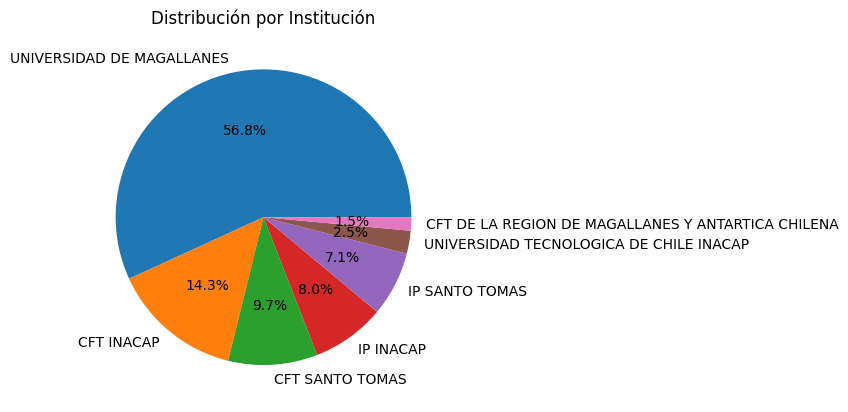

In [9]:
# --- Gráfico de torta (Institución) ---
vals = tabla_nominal.values
labels = tabla_nominal.index.astype(str)
plt.figure()
plt.pie(vals, labels=labels, autopct='%1.1f%%')
plt.title('Distribución por Institución')
plt.show()

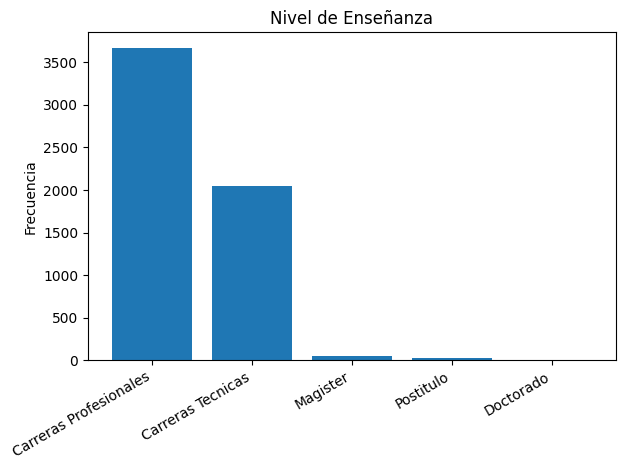

In [10]:
# --- Gráfico de barras (Nivel de Enseñanza) ---
labels = tabla_ordinal.index.astype(str)
heights = tabla_ordinal.values
plt.figure()
plt.bar(labels, heights)
plt.title('Nivel de Enseñanza')
plt.xticks(rotation=30, ha='right')
plt.ylabel('Frecuencia')
plt.tight_layout()
plt.show()

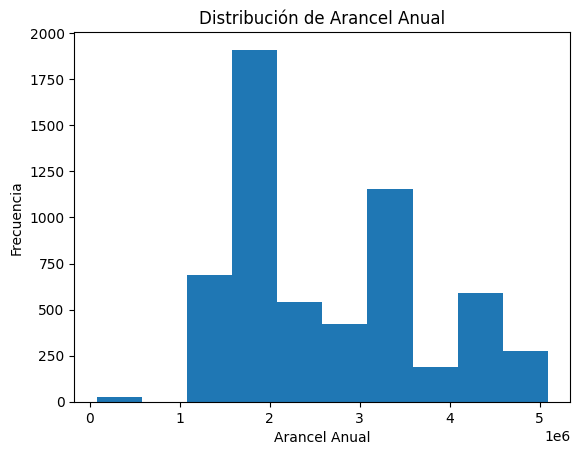

In [11]:
# --- Histograma (Arancel Anual) ---
plt.figure()
plt.hist(df[col_arancel].dropna(), bins=10)
plt.title('Distribución de Arancel Anual')
plt.xlabel('Arancel Anual')
plt.ylabel('Frecuencia')
plt.show()

#### Interpretación (ejemplo guía)
- **Institución**: la torta permite ver **qué instituciones concentran más matrículas**. Sectores más grandes indican mayor proporción.
- **Nivel de Enseñanza**: el gráfico de barras facilita comparar **cuál nivel** (Técnico/Profesional/Postgrado) es **más frecuente**.
- **Arancel Anual**: el histograma muestra **cómo se distribuyen los costos**; si hay sesgo, rangos con mayor concentración, y posibles valores atípicos.


### Paso 4: **Medidas estadísticas**
Se calculan medidas de tendencia central y de dispersión para `Arancel Anual`:
- **Moda**: valor más frecuente del arancel anual.
- **Percentiles (25, 50, 75)**: resumen de la distribución (P50 es la mediana).
- **Dispersión**: Rango (máx - mín), Varianza y Desviación Estándar.

**Interpretación**:
- Una **desviación estándar alta** indica aranceles muy dispersos (más heterogeneidad en costos).
- Si **P75** es muy superior a **P25**, hay **asimetría** o colas largas hacia aranceles altos.


In [12]:
moda = df[col_arancel].mode().iloc[0] if not df[col_arancel].mode().empty else None
percentiles = df[col_arancel].quantile([0.25, 0.5, 0.75])
rango = df[col_arancel].max() - df[col_arancel].min()
varianza = df[col_arancel].var()
desviacion = df[col_arancel].std()

pd.DataFrame({
    'Estadístico': ['Moda', 'P25', 'P50 (Mediana)', 'P75', 'Rango', 'Varianza', 'Desviación Estándar'],
    'Valor': [moda, percentiles.loc[0.25], percentiles.loc[0.5], percentiles.loc[0.75], rango, varianza, desviacion]
})

,Estadístico,Valor
0,Moda,3.555000e+06
1,P25,1.831000e+06
2,P50 (Mediana),2.234000e+06
3,P75,3.555000e+06
4,Rango,5.011000e+06
5,Varianza,1.146764e+12
6,Desviación Estándar,1.070871e+06


### Tabla + Gráfico comparativo (ejemplo)
A modo de síntesis, se muestra la **cantidad de matrículas por institución** junto a un gráfico de barras.
Esto permite **identificar rápidamente** qué instituciones concentran más estudiantes.


In [13]:
resumen_inst = tabla_nominal.rename('Matrículas').to_frame()
resumen_inst.head()

,Matrículas
NOMBRE DE INSTITUCION,
UNIVERSIDAD DE MAGALLANES,3294
CFT INACAP,830
CFT SANTO TOMAS,565
IP INACAP,466
IP SANTO TOMAS,411


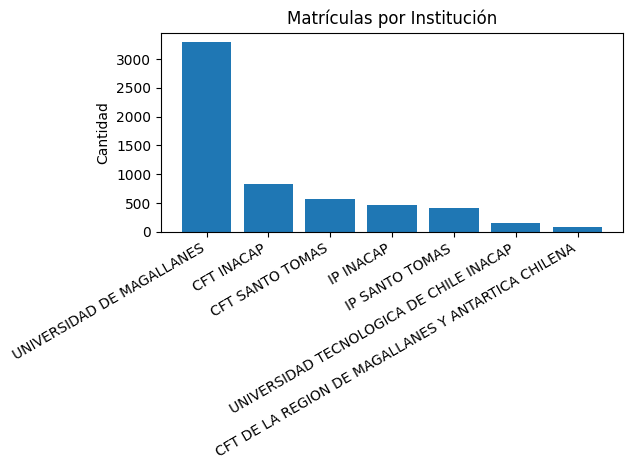

In [14]:
plt.figure()
plt.bar(resumen_inst.index.astype(str), resumen_inst['Matrículas'].values)
plt.title('Matrículas por Institución')
plt.xticks(rotation=30, ha='right')
plt.ylabel('Cantidad')
plt.tight_layout()
plt.show()

### Comentarios finales de la Parte 1
- Se definieron **población** y **muestra**, y se seleccionaron 4 variables representativas para el análisis.
- Las **tablas y gráficos** permiten observar **concentraciones** (instituciones con más matrículas), **orden** por nivel de enseñanza y la **distribución de aranceles**.
- Las **medidas de tendencia** y **dispersión** resumen el comportamiento central y la variabilidad del **arancel anual**.

> Sugerencia: acompaña cada visual con un **comentario breve** con números concretos (por ejemplo, *la institución X concentra el Y% de las matrículas*), una vez ejecutes las celdas y observes los resultados reales.
